# 作業一


In [243]:
!pip install yfinance

In [244]:
import yfinance as yf # yahoo finance 套件

import pandas as pd # 結構化資料處理套件
import numpy as np
import datetime as dt # 時間套件

In [245]:
# 輸入股票代號

stock_id = "2330.TW"

# stock_id = "2357.tw"

# stock_id = "AAPL"

# stock_id = "NVDA"



'''今天往前算幾天'''

# 資料結束時間

#end = dt.date.today()

# output : 2024-09-30

end = dt.date(2024, 6, 2)

# 抓取半年資料（現在-過去180天）

start = end - dt.timedelta(days=393)



'''抓取特定時間'''

# start = dt.datetime(2024, 1, 1)  # 指定的開始日期

# end = dt.datetime(2024, 6, 30)    # 指定的結束日期





# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間

df = yf.download(stock_id, start=start, end=end).reset_index()



df

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
0,2023-05-08 00:00:00+00:00,489.882446,504.0,509.0,502.0,509.0,11243634
1,2023-05-09 00:00:00+00:00,495.714355,510.0,510.0,505.0,507.0,16197743
2,2023-05-10 00:00:00+00:00,488.910461,503.0,508.0,500.0,508.0,18859212
3,2023-05-11 00:00:00+00:00,485.022461,499.0,506.0,498.5,506.0,13382927
4,2023-05-12 00:00:00+00:00,482.106537,496.0,500.0,495.0,496.0,18465362
...,...,...,...,...,...,...,...
257,2024-05-27 00:00:00+00:00,861.811096,869.0,878.0,866.0,872.0,26726954
258,2024-05-28 00:00:00+00:00,857.844177,865.0,873.0,865.0,867.0,25329216
259,2024-05-29 00:00:00+00:00,849.910400,857.0,868.0,856.0,861.0,33436835


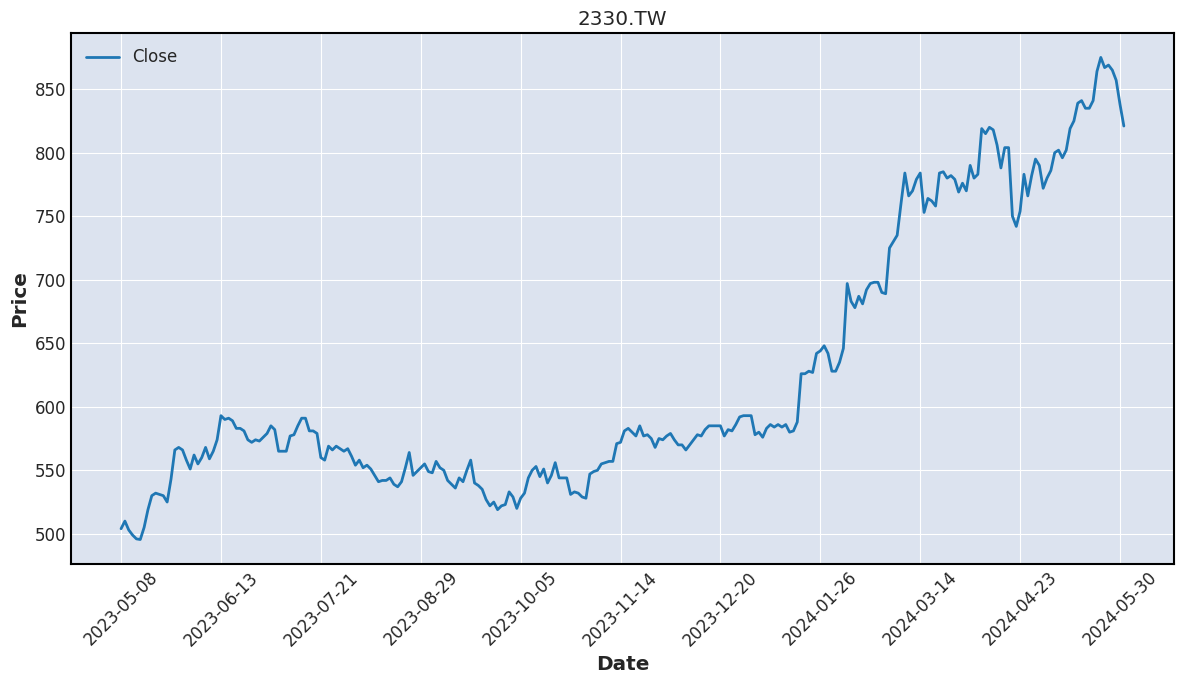

In [246]:
import matplotlib.pyplot as plt



# 畫布尺寸大小設定

plt.figure(figsize=(12, 7))



# 設定要繪製的資料欄位

plt.plot(df['Close'], label='Close')



# 設定 x 軸的時間

num = 10

date = df["Date"].dt.strftime('%Y-%m-%d')

plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num

           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num

           rotation = 45)



# 設定圖表的標題，x 軸和 y 軸的標籤

plt.title(f'{stock_id}')   # 將股票代號設為圖標

plt.xlabel('Date')         # x 軸標籤

plt.ylabel('Price')  # y 軸標籤

plt.legend(loc='upper left') # 在左上角顯示圖例

plt.grid(True) # 在圖上顯示網格

plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊



# 顯示圖表

plt.show()

In [247]:
!pip install mplfinance

In [248]:
# 將原始的 dataframe 再建立一個出來

kplot_df = df.set_index('Date')



# 過濾掉非數字列

numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

kplot_df = kplot_df[numeric_columns]



# 檢查並確保所有數據都是 float

kplot_df = kplot_df.astype(float)

kplot_df['2023-8-01':'2023-09-18'].tail()

Price,Open,High,Low,Close,Volume
Ticker,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
Date,,,,,
2023-09-12 00:00:00+00:00,536.0,545.0,536.0,544.0,16028336.0
2023-09-13 00:00:00+00:00,545.0,548.0,541.0,541.0,16191392.0
2023-09-14 00:00:00+00:00,544.0,550.0,543.0,550.0,17144287.0
2023-09-15 00:00:00+00:00,549.0,558.0,547.0,558.0,42517441.0
2023-09-18 00:00:00+00:00,548.0,549.0,540.0,540.0,36684692.0


In [249]:
# kplot_df.fillna(0, inplace=True)  # 用 0 填補

In [250]:
kplot_df.columns

# 將 MultiIndex 轉換為單層索引

kplot_df.columns = kplot_df.columns.get_level_values(0)



# 檢查轉換後的欄位名稱

print(kplot_df.head())

Price                       Open   High    Low  Close      Volume
Date                                                             
2023-05-08 00:00:00+00:00  509.0  509.0  502.0  504.0  11243634.0
2023-05-09 00:00:00+00:00  507.0  510.0  505.0  510.0  16197743.0
2023-05-10 00:00:00+00:00  508.0  508.0  500.0  503.0  18859212.0
2023-05-11 00:00:00+00:00  506.0  506.0  498.5  499.0  13382927.0
2023-05-12 00:00:00+00:00  496.0  500.0  495.0  496.0  18465362.0


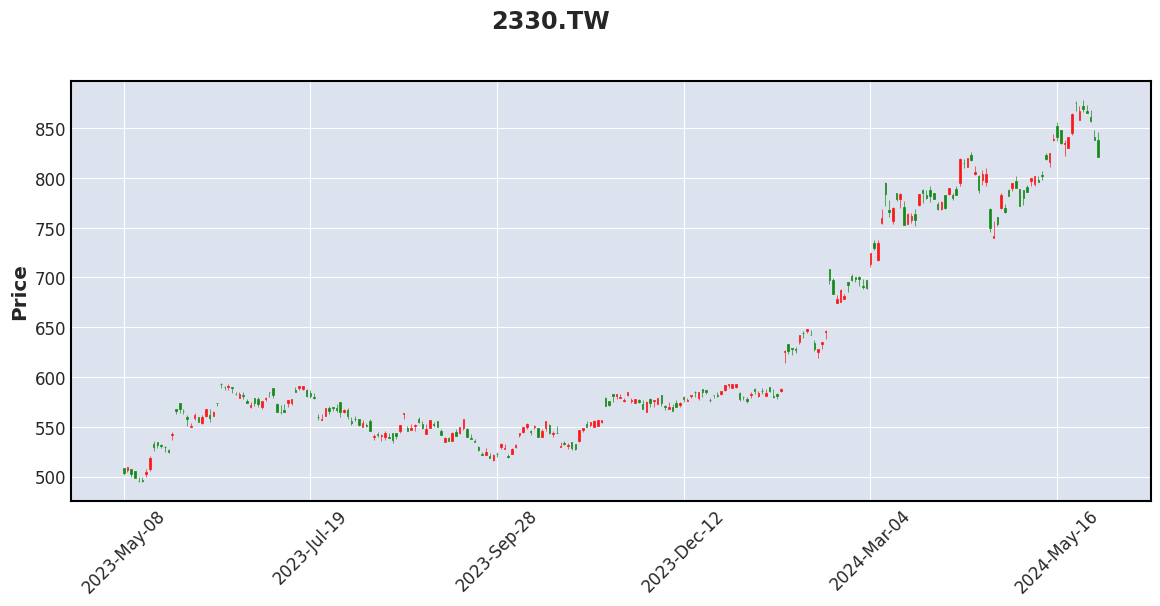

In [251]:
import mplfinance as mpf

# 設置繪圖風格

my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)

my_style = mpf.make_mpf_style(base_mpf_style='default',

                marketcolors=my_color)



# 使用 mplfinance 繪製 K 線圖

mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

# 分割訓練、測試資料

In [252]:
# 資料準備
kplot_df = kplot_df["Close"]
#設定窗口大小
window_size = 20

sequence_data = []

for i in range(len(kplot_df)-window_size+1):
    window = kplot_df.iloc[i:i+window_size]
    sequence_data.append(window.values)

sequence_data = np.array(sequence_data)
print(sequence_data.shape)



(243, 20)


In [253]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [254]:
# 準備數據：前19天當輸入，第20天當預測目標
X = sequence_data[:, :-1]
y = sequence_data[:, -1].reshape(-1, 1)

# 初始化 scaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

# 對整個 X 和 y 進行標準化
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y).flatten()  # 轉成一維向量

# 切分成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=69)

# 檢查數據集形狀
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")

Training data shape: (194, 19)
Test data shape: (49, 19)
Training target shape: (194,)
Test target shape: (49,)


In [255]:
print(X.shape)
print(y.shape)

(243, 19)
(243, 1)


In [256]:
class Dataset(Dataset):
    def __init__(self,X,y):
        self.X = torch.tensor(X,dtype=torch.float32)
        self.y = torch.tensor(y,dtype=torch.float32)
        
    def __len__(self):
        return len(self.y)

    def __getitem__(self,index):
        return self.X[index], self.y[index]
    

In [257]:
# 建立 DataLoader
train_dataset = Dataset(X_train, y_train)
test_dataset = Dataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# 確認 DataLoader 的輸出
for X_batch, y_batch in train_loader:
    print(X_batch.shape)  # (batch_size, 4)
    print(y_batch.shape)  # (batch_size,)
    break

torch.Size([16, 19])
torch.Size([16])


In [258]:
import torch.nn as nn

## 用lstm 預測股價

In [259]:
# 定義lstm

class Gru(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=4, output_size=1, dropout=0.2):
        super(Gru, self).__init__()
        
        # gru 層
        self.lstm = nn.GRU(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        # Dropout 層
        self.dropout = nn.Dropout(dropout)
        # 全連接層
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # LSTM 層的輸出 (out) 和隱藏狀態 (hn, cn)
        out, _ = self.lstm(x)
        
        # 取最後一個時間步的輸出
        out = out[:, -1, :]
        
        # 通過 Dropout 層
        out = self.dropout(out)
        # 通過全連接層進行最終預測
        out = self.fc(out)
        
        return out

# 創建模型
model = Gru(input_size=1, hidden_size=64, num_layers=4, output_size=1)


# 定義損失函數和優化器
# 設定訓練參數
epochs = 100
lr = 0.005

criterion = nn.MSELoss() 

optimizer = torch.optim.SGD(model.parameters(), lr=lr)  # 隨機梯度下降優化器



# 訓練模型
for epoch in range(epochs):
    model.train()  # 設定模型為訓練模式
    
    # 初始化累積損失
    epoch_loss = 0.0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()  # 清除梯度
        
        # 前向傳播
        X_batch = X_batch.view(X_batch.size(0), X_batch.size(1), 1)  # (batch_size, sequence_length, features)
        predictions = model(X_batch)  # 使用LSTM模型預測
        y_batch = y_batch.view(-1, 1)
        # 計算損失
        loss = criterion(predictions, y_batch)
        
        # 反向傳播
        loss.backward()
        
        # 更新權重
        optimizer.step()
        
        epoch_loss += loss.item()  # 累加損失
    
    # 每10個 epoch 輸出一次訓練狀態
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.4f}")

# 使用訓練好的模型預測測試資料
model.eval()  # 設定模型為評估模式
all_predictions = []  # 用來存儲所有預測結果

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.view(X_batch.size(0), X_batch.size(1), 1)  # 根據需要調整 X 的形狀
        batch_predictions = model(X_batch)  # 獲取當前批次的預測結果
        
        all_predictions.append(batch_predictions.detach().cpu().numpy()) 

# 將所有預測結果合併成一個大陣列
all_predictions = np.concatenate(all_predictions, axis=0)

# 檢查合併後的預測結果形狀
print(f"Total number of predictions: {all_predictions.shape[0]}")


Epoch [10/100], Loss: 0.7267
Epoch [20/100], Loss: 0.0358
Epoch [30/100], Loss: 0.0346
Epoch [40/100], Loss: 0.0405
Epoch [50/100], Loss: 0.0705
Epoch [60/100], Loss: 0.0423
Epoch [70/100], Loss: 0.0331
Epoch [80/100], Loss: 0.0357
Epoch [90/100], Loss: 0.0360
Epoch [100/100], Loss: 0.0336
Total number of predictions: 49


In [264]:
# 將預測結果反標準化回原始尺度
all_predictions = all_predictions.reshape(-1, 1)  # 這裡假設您有一個列向量
all_predictions = scaler_y.inverse_transform(all_predictions)

# 計算前20筆的平均值
first_20_avg = np.mean(all_predictions[:20])
print("Average of first 20 predictions:", first_20_avg)

# 使用前20筆的平均值來填充前19筆資料
additional_predictions = np.full((19, 1), first_20_avg)
print("Additional predictions with first 20 average:", additional_predictions)

# 合併填充的預測結果與原來的預測結果
all_predictions = np.concatenate([additional_predictions, all_predictions])

# 打印最終的預測結果
print("Test predictions with additional values:", all_predictions)


Average of first 20 predictions: 629.34106
Additional predictions with first 20 average: [[629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]]
Test predictions with additional values: [[629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [629.34106]
 [781.3466 ]
 [552.33765]
 [529.52747]
 [571.9871 ]
 [592.0395 ]
 [544.1225 ]
 [582.80743]
 [578.3127 ]
 [528.74304]
 [528.07355]
 [729.2561 ]
 [805.32355]
 [572.3675 ]
 [795.057  ]
 [580.5604 ]
 [799.3013 ]
 [810.00964]
 [571.36725]
 [551.66327]
 [582.6179 ]
 [785.74976]
 [563.8638 ]
 [619.229  ]
 [549.20374]
 [577.9988 ]
 [529.6956 ]
 [835.5747 ]
 [582.4131 ]
 [799.3168 

In [265]:
 kplot_df = kplot_df.reset_index()

In [266]:
kplot_df

,index,Date,Close
0,0,2023-05-08 00:00:00+00:00,504.0
1,1,2023-05-09 00:00:00+00:00,510.0
2,2,2023-05-10 00:00:00+00:00,503.0
3,3,2023-05-11 00:00:00+00:00,499.0
4,4,2023-05-12 00:00:00+00:00,496.0
...,...,...,...
257,257,2024-05-27 00:00:00+00:00,869.0
258,258,2024-05-28 00:00:00+00:00,865.0
259,259,2024-05-29 00:00:00+00:00,857.0
260,260,2024-05-30 00:00:00+00:00,838.0


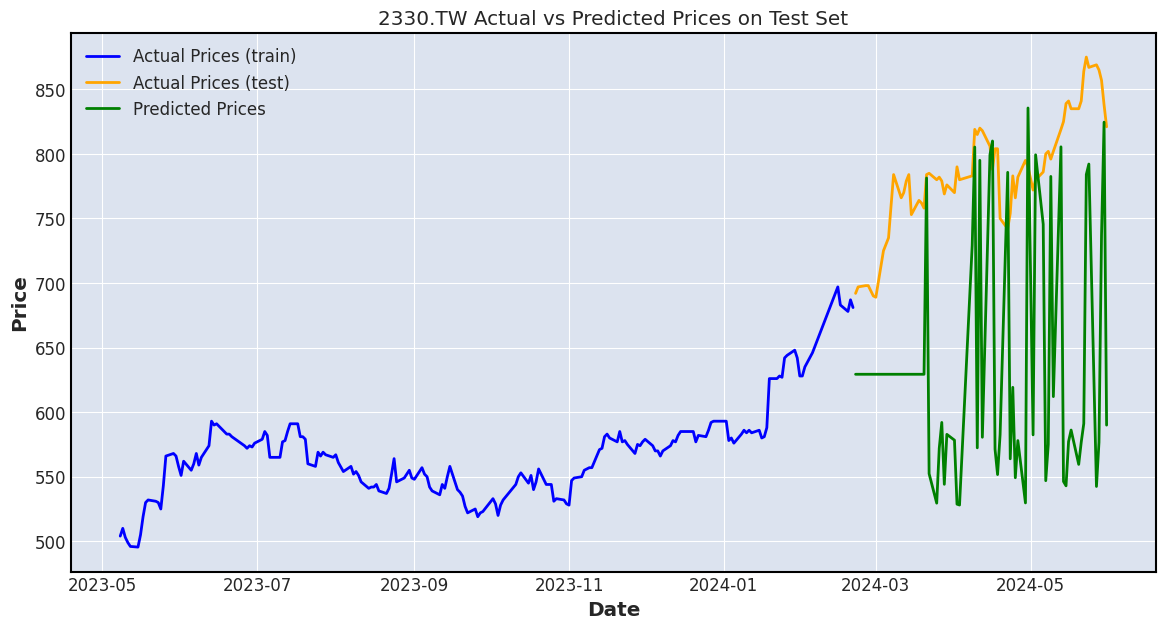

In [267]:
yhat = all_predictions  # 預測結果
yhats = yhat.flatten()

# 取出測試集日期，根據20天為一window選擇適當的索引
test_dates = kplot_df['Date'][len(X_train):]

# 畫圖
plt.figure(figsize=(14, 7))

# 訓練集實際價格走勢
plt.plot(kplot_df['Date'][:len(X_train)], kplot_df['Close'][:len(X_train)], label='Actual Prices (train)', color='blue', linewidth=2)

# 測試集實際價格走勢
plt.plot(kplot_df['Date'][len(X_train):], kplot_df['Close'][len(X_train):], label='Actual Prices (test)', color='orange', linewidth=2)

# 測試集預測價格走勢，使用每20天的日期對應到每個window的預測值
plt.plot(test_dates, yhats, label='Predicted Prices', color='green')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2330.TW Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()


# 作業二



In [268]:
len(test_loader)

4

In [269]:
# 定義 Transformer 模型
class Transformers(nn.Module):
    def __init__(self, input_size=1, d_model=128, num_layers=6, output_size=1):
        super(Transformers, self).__init__()
        
        self.d_model = d_model
        
        # 嵌入層：將輸入映射到 d_model 維度
        self.embedding = nn.Linear(input_size, d_model)
        
        # Transformer 層
        self.transformer = nn.Transformer(d_model=d_model, nhead=4, num_encoder_layers=num_layers, num_decoder_layers=num_layers, batch_first=True)
        
        # 輸出層
        self.fc = nn.Linear(d_model, output_size)

    def forward(self, x):

        x = self.embedding(x)

        x = x.permute(1, 0, 2)
        transformer_out = self.transformer(x, x) 
        # 取最後一個時間步的輸出
        out = transformer_out[-1, :, :]
        
        # 通過全連接層進行最終預測
        out = self.fc(out)
        
        return out

# 創建模型
model = Transformers(input_size=1, d_model=128, num_layers=6, output_size=1)

# 定義損失函數和優化器
criterion =  nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

# 訓練模型
epochs = 100
# 訓練過程

for epoch in range(epochs):
    model.train()  # 設定模型為訓練模式
    
    epoch_loss = 0.0  # 本輪epoch的總損失初始化為0
    for X_batch, y_batch in train_loader:  # 遍歷訓練資料集
        optimizer.zero_grad()  # 清除梯度
        
        # 前向傳播
        X_batch = X_batch.view(X_batch.size(0), X_batch.size(1), 1)  # 調整輸入張量形狀 (batch_size, sequence_length, features)
        predictions = model(X_batch)  # 使用 Transformer 模型預測
        
        # 確保目標 y_batch 的形狀與預測相同
        y_batch = y_batch.view(-1, 1)  # 調整目標的形狀
        
        # 計算損失
        loss = criterion(predictions, y_batch)  # 計算預測與真實值的損失
        
        # 反向傳播
        loss.backward()
        
        # 更新權重
        optimizer.step()
        
        epoch_loss += loss.item()  # 累加本輪的損失值
    
    # 每10個epoch輸出一次損失
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.4f}")


# 使用訓練好的模型進行預測
model.eval()  # 設定模型為評估模式
all_predictions = []

with torch.no_grad():
    for X_batch, _ in test_loader:
        X_batch = X_batch.view(X_batch.size(0), X_batch.size(1), 1)  # 根據需要調整 X 的形狀
        print(X_batch.shape)
        batch_predictions = model(X_batch)
        all_predictions.append(batch_predictions.detach().cpu().numpy())

all_predictions = np.concatenate(all_predictions, axis=0)

print(f"Total number of predictions: {all_predictions.shape[0]}")

Epoch [10/100], Loss: 1.0781
Epoch [20/100], Loss: 0.1693
Epoch [30/100], Loss: 0.1816
Epoch [40/100], Loss: 0.1528
Epoch [50/100], Loss: 0.2023
Epoch [60/100], Loss: 0.1759
Epoch [70/100], Loss: 0.2411
Epoch [80/100], Loss: 0.1785
Epoch [90/100], Loss: 0.1953
Epoch [100/100], Loss: 0.1646
torch.Size([16, 19, 1])
torch.Size([16, 19, 1])
torch.Size([16, 19, 1])
torch.Size([1, 19, 1])
Total number of predictions: 49


In [270]:
# 將預測結果反標準化回原始尺度
all_predictions = all_predictions.reshape(-1, 1)  
all_predictions = scaler_y.inverse_transform(all_predictions)

# 計算前20筆的平均值
first_20_avg = np.mean(all_predictions[:20])
print("Average of first 20 predictions:", first_20_avg)

# 使用前20筆的平均值來填充前19筆資料
additional_predictions = np.full((19, 1), first_20_avg)
print("Additional predictions with first 20 average:", additional_predictions)

# 合併填充的預測結果與原來的預測結果
all_predictions = np.concatenate([additional_predictions, all_predictions])

# 打印最終的預測結果
print("Test predictions with additional values:", all_predictions)


Average of first 20 predictions: 620.05457
Additional predictions with first 20 average: [[620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]]
Test predictions with additional values: [[620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [620.05457]
 [767.7581 ]
 [556.756  ]
 [556.756  ]
 [556.7561 ]
 [556.75604]
 [556.756  ]
 [556.75604]
 [556.7561 ]
 [556.756  ]
 [556.756  ]
 [767.7581 ]
 [767.75824]
 [556.756  ]
 [767.7582 ]
 [556.75604]
 [767.75824]
 [767.73914]
 [556.7484 ]
 [556.7481 ]
 [556.7482 ]
 [767.7391 ]
 [556.74854]
 [767.7382 ]
 [556.7481 ]
 [556.74817]
 [556.7481 ]
 [767.73914]
 [556.74817]
 [767.7391 

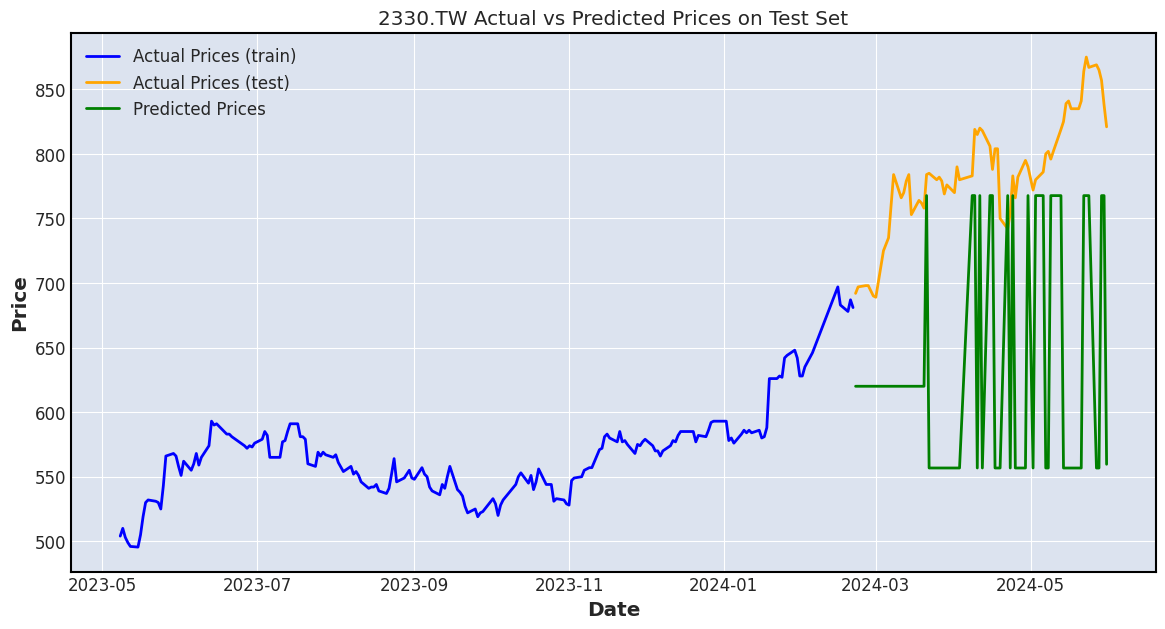

In [271]:
yhat = all_predictions  # 預測結果
yhats = yhat.flatten()

# 取出測試集日期，根據5天為一window選擇適當的索引
test_dates = kplot_df['Date'][len(X_train):]

# 畫圖
plt.figure(figsize=(14, 7))

# 訓練集實際價格走勢
plt.plot(kplot_df['Date'][:len(X_train)], kplot_df['Close'][:len(X_train)], label='Actual Prices (train)', color='blue', linewidth=2)

# 測試集實際價格走勢
plt.plot(kplot_df['Date'][len(X_train):], kplot_df['Close'][len(X_train):], label='Actual Prices (test)', color='orange', linewidth=2)

# 測試集預測價格走勢，使用每20天的日期對應到每個window的預測值
plt.plot(test_dates, yhats, label='Predicted Prices', color='green')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2330.TW Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()
